In [45]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import seaborn as sns

In [46]:
df=pd.read_csv("nepal_final.csv")
df.head()

,Date,total cases,new cases,cases smoothed,total deaths,new deaths,median_aged,age_65_older,Age_70_older,GDP,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2020-01-06,0,0,0.0,0,0,25,5.809,3.212,2442.804,15,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
1,2020-01-07,0,0,0.0,0,0,25,5.809,3.212,2442.804,15,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2,2020-01-08,0,0,0.0,0,0,25,5.809,3.212,2442.804,15,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
3,2020-01-09,0,0,0.0,0,0,25,5.809,3.212,2442.804,15,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
4,2020-01-10,0,0,0.0,0,0,25,5.809,3.212,2442.804,15,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [47]:
df.shape

(268, 19)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


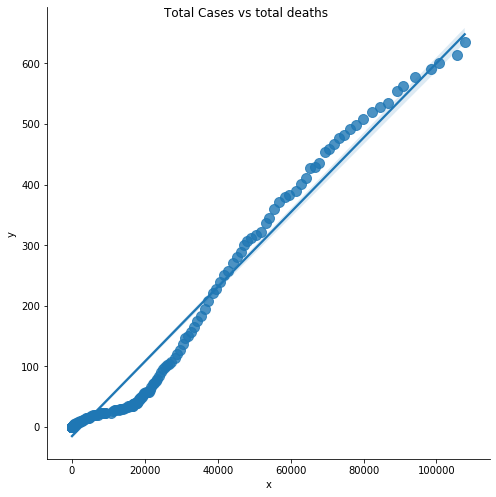

In [48]:
data = pd.DataFrame(data={'x': df['total cases'], 'y': df['total deaths']})

# Create lmplot
lm = sns.lmplot('x', 'y', data, size=7, truncate=True, scatter_kws={"s": 100})

# Access the Figure
fig = lm.fig 

# Add a title to the Figure
fig.suptitle('Total Cases vs total deaths ', fontsize=12)
# Show the plot
plt.show()

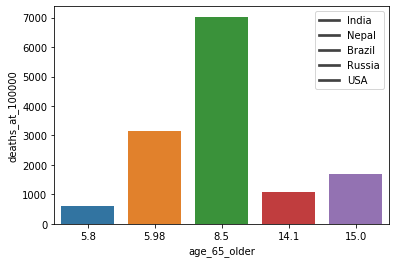

In [49]:
dft=pd.read_csv("deathsat100000.csv")
ax = sns.barplot(x=dft['age_65_older'], y=dft['deaths_at_100000'],data=dft)
legend_labels  = ['India', 'Nepal', 'Brazil', 'Russia', 'USA']

# Plot the legend
plt.legend(legend_labels)

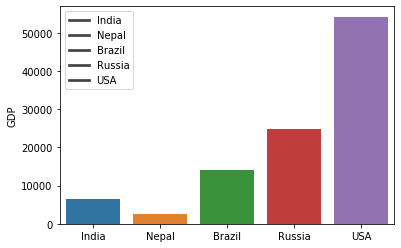

In [65]:
dft=pd.read_csv("deathsat100000.csv")
legend_labels  = ['India', 'Nepal', 'Brazil', 'Russia', 'USA']
ax = sns.barplot(x=legend_labels, y=dft['GDP'],data=dft)


# Plot the legend
plt.legend(legend_labels)

In [51]:
median_total=math.floor(df['total cases'].median())
df['total cases'] = df['total cases'].fillna(median_total)

median_old=math.floor(df['age_65_older'].median())
df['age_65_older'] = df['age_65_older'].fillna(median_old)

median_new = math.floor(df['GDP'].median())
df['GDP'] = df['GDP'].fillna(median_new)

reg=linear_model.LinearRegression()
reg.fit(df[['total cases','age_65_older','GDP']],df['total deaths'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
reg.coef_


array([6.15809057e-03, 4.47845461e-39, 0.00000000e+00])

In [53]:
a = reg.predict([(81970,28.2,3967)])[0]

In [54]:
print('The predicted death count for the given data is ')
print(a)

The predicted death count for the given data is 
489.2963711924428
